# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Cities file
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 2 of set 0 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 3 of set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 4 of set 0 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 5 of set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 6 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 7 of set 0 | kapaa
http://api.openweathermap.org/data/2.5/wea

Processing record 7 of set 1 | pastavy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 8 of set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 9 of set 1 | esso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 10 of set 1 | hearst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 11 of set 1 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 12 of set 1 | tarut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 13 of set 1 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacab

Processing record 13 of set 2 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 14 of set 2 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 15 of set 2 | russellville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 16 of set 2 | riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 17 of set 2 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 18 of set 2 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 19 of set 2 | agapovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing r

Processing record 20 of set 3 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 21 of set 3 | krasnyy oktyabr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 22 of set 3 | sanming
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 23 of set 3 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 24 of set 3 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 25 of set 3 | asayita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 26 of set 3 | artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4

Processing record 26 of set 4 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 27 of set 4 | ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 28 of set 4 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 29 of set 4 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 30 of set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 31 of set 4 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 32 of set 4 | saint-donat-de-montcalm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071c

Processing record 33 of set 5 | nsunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 34 of set 5 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 35 of set 5 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 36 of set 5 | boundiali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 37 of set 5 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 38 of set 5 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 39 of set 5 | ojinaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 40

Processing record 40 of set 6 | grootfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 41 of set 6 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 42 of set 6 | ozernovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 43 of set 6 | myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 44 of set 6 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 45 of set 6 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 46 of set 6 | oskemen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb

Processing record 46 of set 7 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 47 of set 7 | ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 48 of set 7 | iguatemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 49 of set 7 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 50 of set 7 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 0 of set 8 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 1 of set 8 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not foun

Processing record 2 of set 9 | lindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 3 of set 9 | mingaora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 4 of set 9 | kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 5 of set 9 | itacare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 6 of set 9 | belem de sao francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 7 of set 9 | gaoual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 8 of set 9 | rawah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processi

Processing record 9 of set 10 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 10 of set 10 | porto walter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 11 of set 10 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 12 of set 10 | puerto penasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 13 of set 10 | bafoulabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 14 of set 10 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 15 of set 10 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4

Processing record 15 of set 11 | fevralsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 16 of set 11 | albuquerque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 17 of set 11 | comarapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 18 of set 11 | porto velho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 19 of set 11 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 20 of set 11 | oberstdorf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 21 of set 11 | sassandra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7

In [6]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Temp          556
Lat           556
Lng           556
Wind Speed    556
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.describe()

,Cloudiness,Date,Humidity,Temp,Lat,Lng,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,50.014388,1.588881e+09,67.890288,63.093615,20.233165,12.509892,7.607032
std,39.273352,8.664873e+01,23.328145,18.588889,33.231739,87.904358,4.685782
min,0.000000,1.588881e+09,3.000000,1.530000,-54.800000,-179.170000,0.740000
25%,5.750000,1.588881e+09,54.000000,51.062500,-8.762500,-59.585000,4.245000
50%,46.500000,1.588881e+09,75.000000,65.380000,25.335000,14.010000,6.930000
75%,90.000000,1.588882e+09,86.250000,78.517500,48.797500,82.712500,10.290000
max,100.000000,1.588882e+09,100.000000,103.750000,78.220000,179.320000,32.280000


In [15]:
#  Get the indices of cities that have humidity over 100%.
# Work later

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# humid_level = 100

# clean_city_data = weather_data[(weather_data['Humidity'] >= humid_level)

# clean_city_data

SyntaxError: invalid syntax (<ipython-input-21-3d87723464e2>, line 7)

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

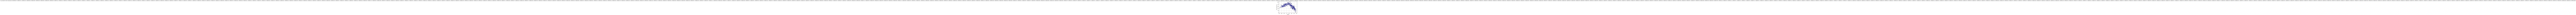

In [31]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

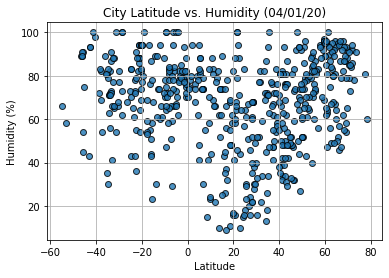

In [11]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

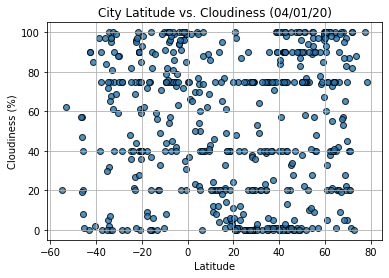

In [12]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

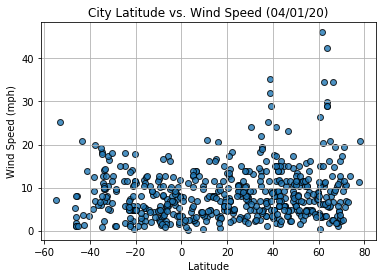

In [13]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


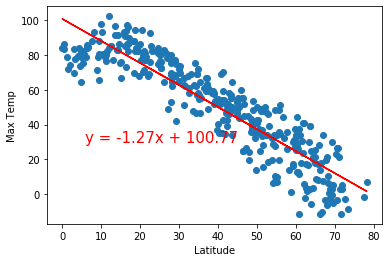

In [16]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


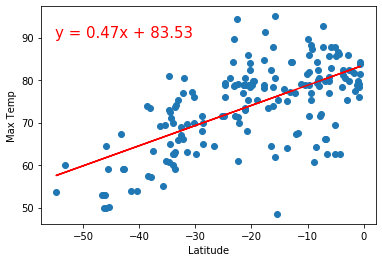

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


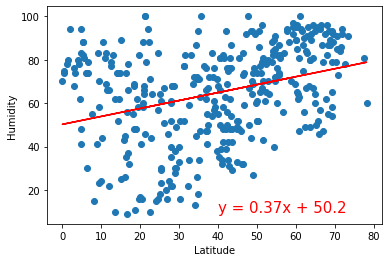

In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


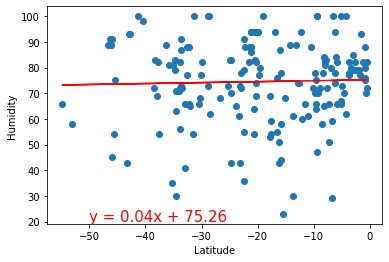

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


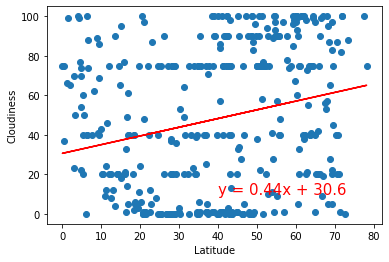

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


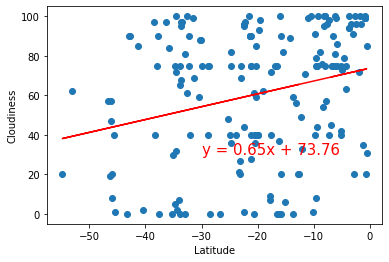

In [21]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


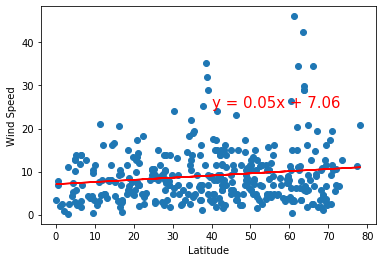

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


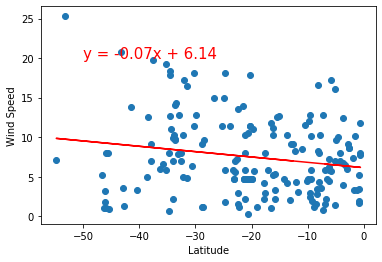

In [23]:

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)